#### Model deployment: validation of 16 full supported variants identified from 2000 cohort analyses on new dataset of 3000 cohort (16 Full supported variants and Covariates).

**Introduction** 

We saved the models (SVC, Logistic Regression, Random Forest, XGBoost) from 16 full supported variants that received non-zero weights in all the decision-tree like models in the stratified 5-foldCV (Random Forest and XGBoost) of the 2000 cohort. We validate these models on new arrival of 3000 cohort from 3rd and 4th wave of the pandemic. 
We recycled this Jupyter notebook 4-times to account for saved models in stratified fold 2 - 5.

In [1]:
# Import all libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import joblib

#### Classifier Libraries
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


# compare ensemble to each baseline classifier
from matplotlib import pyplot
## Other Libraries
from statistics import mean, stdev
from sklearn.metrics import roc_curve, roc_auc_score,auc, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import make_scorer, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
fs="\t"

path="/Users/Hp/Desktop/3000_cohort_analysis/"
# import dataset for validation  
df = pd.read_csv(path+"feature_count_16_fully_supported_variants_latest.csv", delimiter=',', quotechar='"', index_col='sample_ID')

df.head()

,age,gender,grouping,ZBED3,PLEC,TRIM72,HDGFL2,SECISBP2L,CEP131,GOLGA6L3,PCSK5,GFM1,ZBTB3,BMS1P1;FRMPD2B,SPATA6,CNTFR,MIR933,ZRANB3,LOC100996720
sample_ID,,,,,,,,,,,,,,,,,,,
AR-COVID3-USC-AREZZO_hg38,29,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2
BS-COV-56_hg38,32,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
BS-COV-83_hg38,34,0,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0
COV10001-3742_hg38,67,1,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1
COV10013-3746_hg38,71,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2


In [3]:
# check shape of dataset 
df.shape

(618, 19)

Not Severe 19.74 % of the dataset
Severe 80.26 % of the dataset


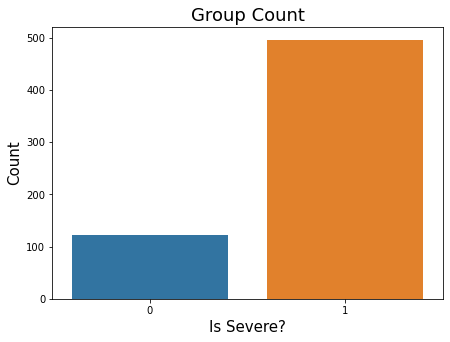

In [4]:
# Checking dataset distribution (target variable)
print('Not Severe', round(df['grouping'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Severe', round(df['grouping'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

plt.figure(figsize=(7,5))
sns.countplot(df['grouping'])
plt.title("Group Count", fontsize=18)
plt.xlabel("Is Severe?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [5]:
# prepare the dataset 
# define target variable 
y = df['grouping']

# features 
X = df.drop('grouping', 1)
X_1 = X.values 



In [6]:
# Binarize the target variable

scaler = StandardScaler()

# standardize the dataset to deal with inconsistencies such as age 
scaler.fit(X_1)

y_test = label_binarize(y, classes=[0, 1])

# standardized validation set
X_test = scaler.transform(X_1)

#### Load the saved ML models from 2000 cohort  

In [7]:
# Load the saved ML models 

# SVC classifier 
with open(path + 'model_svc_fold_1_full_support_2000_cohort', 'rb') as f: 
    model_svc = joblib.load(f)
svm = model_svc


# Logistic Reg. classifier 
with open(path + 'model_LOR_fold_1_full_support_2000_cohort', 'rb') as f: 
    model_log = joblib.load(f)

lr = model_log

# Random Forest classifier 
with open(path + 'model_RF_fold_1_full_support_2000_cohort', 'rb') as f: 
    model_rf = joblib.load(f)

rf = model_rf


# Random XGBoost classifier 
with open(path + 'model_XGB_fold_1_full_support_2000_cohort', 'rb') as f: 
    model_xgb = joblib.load(f)
    
xgboost = model_xgb

#### Validation of Model classifiers on 100 % unseen 3000 cohort dataset 

accuracy of the best classifier after CV is 77.508%
Test Accuracy score 0.7750809061488673
Test Matthews correlation coefficient 0.5712993513286874
Test F1- score 0.8378063010501751
Test Precision score 0.9944598337950139
Test Recall score 0.7237903225806451
              precision    recall  f1-score   support

           0       0.47      0.98      0.63       122
           1       0.99      0.72      0.84       496

    accuracy                           0.78       618
   macro avg       0.73      0.85      0.74       618
weighted avg       0.89      0.78      0.80       618



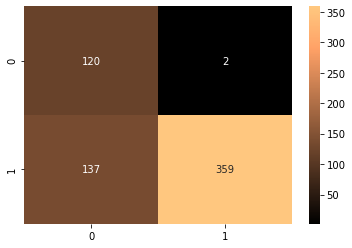

accuracy_score of the best classifier after CV is 77.670%
Test Accuracy score 0.7766990291262136
Test Matthews correlation coefficient 0.5775985558798568
Test F1- score 0.838785046728972
Test Precision score 0.9972222222222222
Test Recall score 0.7237903225806451
              precision    recall  f1-score   support

           0       0.47      0.99      0.64       122
           1       1.00      0.72      0.84       496

    accuracy                           0.78       618
   macro avg       0.73      0.86      0.74       618
weighted avg       0.89      0.78      0.80       618



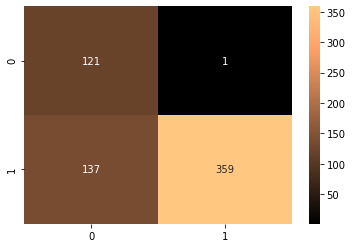

accuracy_score of the best classifier after CV is 81.715%
Test Accuracy score 0.8171521035598706
Test Matthews correlation coefficient 0.6211402057595613
Test F1- score 0.8723163841807909
Test Precision score 0.9922879177377892
Test Recall score 0.7782258064516129
              precision    recall  f1-score   support

           0       0.52      0.98      0.68       122
           1       0.99      0.78      0.87       496

    accuracy                           0.82       618
   macro avg       0.76      0.88      0.78       618
weighted avg       0.90      0.82      0.83       618



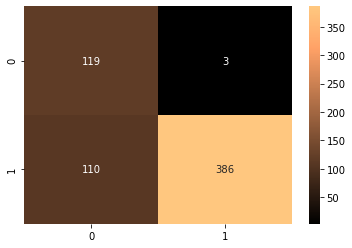

accuracy_score of the best classifier after CV is 80.583%
Test Accuracy score 0.8058252427184466
Test Matthews correlation coefficient 0.5816441496962483
Test F1- score 0.8651685393258427
Test Precision score 0.9771573604060914
Test Recall score 0.7762096774193549
              precision    recall  f1-score   support

           0       0.50      0.93      0.65       122
           1       0.98      0.78      0.87       496

    accuracy                           0.81       618
   macro avg       0.74      0.85      0.76       618
weighted avg       0.88      0.81      0.82       618



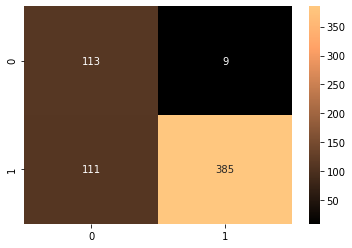

In [8]:
# Support Vector Classifier 
y_predict_svm = svm.predict(X_test)

accuracy = accuracy_score(y_test,y_predict_svm)
print('accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

#Classification reports SVC 
print('Test Accuracy score %s' % accuracy_score(y_test, y_predict_svm))
print('Test Matthews correlation coefficient %s' % matthews_corrcoef(y_test, y_predict_svm))
print('Test F1- score %s' % f1_score(y_test, y_predict_svm))
print('Test Precision score %s' % precision_score(y_test, y_predict_svm))
print('Test Recall score %s' % recall_score(y_test, y_predict_svm))
print(classification_report(y_test, y_predict_svm))
confusion_matrix(y_test, y_predict_svm)
conf_matrix = confusion_matrix(y_test,y_predict_svm)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
plt.show()

# Logistic Regression Classifier 
y_predict_log = lr.predict(X_test)

accuracy = accuracy_score(y_test,y_predict_log)
print('accuracy_score of the best classifier after CV is %.3f%%' % (accuracy*100))

#Classification reports Logreg
print('Test Accuracy score %s' % accuracy_score(y_test, y_predict_log))
print('Test Matthews correlation coefficient %s' % matthews_corrcoef(y_test, y_predict_log))
print('Test F1- score %s' % f1_score(y_test, y_predict_log))
print('Test Precision score %s' % precision_score(y_test, y_predict_log))
print('Test Recall score %s' % recall_score(y_test, y_predict_log))
print(classification_report(y_test, y_predict_log))
confusion_matrix(y_test, y_predict_log)
conf_matrix = confusion_matrix(y_test,y_predict_log)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
plt.show()

# Random Forest Classifier 
y_predict_rf = rf.predict(X_test)

accuracy = accuracy_score(y_test,y_predict_rf)
print('accuracy_score of the best classifier after CV is %.3f%%' % (accuracy*100))

#Classification reports Random Forest 
print('Test Accuracy score %s' % accuracy_score(y_test, y_predict_rf))
print('Test Matthews correlation coefficient %s' % matthews_corrcoef(y_test, y_predict_rf))
print('Test F1- score %s' % f1_score(y_test, y_predict_rf))
print('Test Precision score %s' % precision_score(y_test, y_predict_rf))
print('Test Recall score %s' % recall_score(y_test, y_predict_rf))
print(classification_report(y_test, y_predict_rf))
confusion_matrix(y_test, y_predict_rf)
conf_matrix = confusion_matrix(y_test,y_predict_rf)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
plt.show()


# XGBoost Classifier 
y_predict_xgboost = xgboost.predict(X_test)

accuracy = accuracy_score(y_test,y_predict_xgboost)
print('accuracy_score of the best classifier after CV is %.3f%%' % (accuracy*100))

#Classification reports XGBoost classifier  
print('Test Accuracy score %s' % accuracy_score(y_test, y_predict_xgboost))
print('Test Matthews correlation coefficient %s' % matthews_corrcoef(y_test, y_predict_xgboost))
print('Test F1- score %s' % f1_score(y_test, y_predict_xgboost))
print('Test Precision score %s' % precision_score(y_test, y_predict_xgboost))
print('Test Recall score %s' % recall_score(y_test, y_predict_xgboost))
print(classification_report(y_test, y_predict_xgboost))
confusion_matrix(y_test, y_predict_xgboost)
conf_matrix = confusion_matrix(y_test,y_predict_xgboost)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap=plt.cm.copper)
plt.show()

#### ROC/AUC Curve interpretations

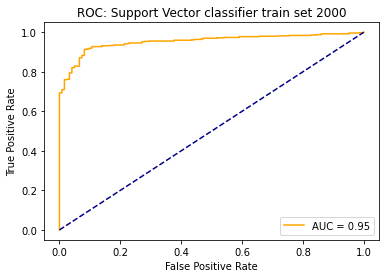

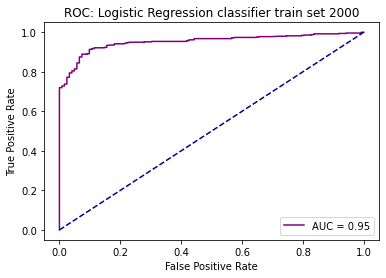

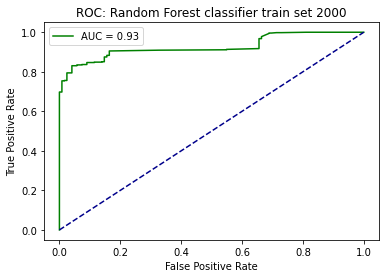

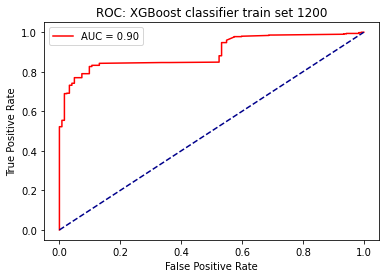

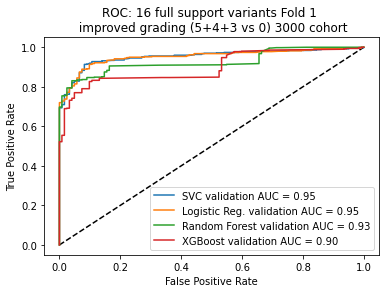

In [9]:

# 1) SVC Classifier

# Now plot the ROC curve for SVC Classifier  whole set 
probs = svm.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label = 'AUC = %0.2f' % auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC: Support Vector classifier train set 2000')
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)

# 2) Logistic Reg. 
probs_1 = lr.predict_proba(X_test)
probs_1 = probs_1[:, 1]
auc_1 = roc_auc_score(y_test, probs_1)
fpr_1, tpr_1, thresholds = roc_curve(y_test, probs_1)
def plot_roc_curve(fpr_1, tpr_1):
    plt.plot(fpr_1, tpr_1, color='purple', label = 'AUC = %0.2f' % auc_1)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC: Logistic Regression classifier train set 2000')
    plt.legend()
    plt.show()
plot_roc_curve(fpr_1, tpr_1)

# 3) Random Forest 
probs_2 = rf.predict_proba(X_test)
probs_2 = probs_2[:, 1]
auc_2 = roc_auc_score(y_test, probs_2)
fpr_2, tpr_2, thresholds = roc_curve(y_test, probs_2)
def plot_roc_curve(fpr_2, tpr_2):
    plt.plot(fpr_2, tpr_2, color='green', label = 'AUC = %0.2f' % auc_2)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC: Random Forest classifier train set 2000')
    plt.legend()
    plt.show()
plot_roc_curve(fpr_2, tpr_2)

# 4) XGBoost classifier 

# 3) AUC and ROC curve Random Forest classifier
# Only train set screened  
probs_3 = xgboost.predict_proba(X_test)
probs_3 = probs_3[:, 1]
auc_3 = roc_auc_score(y_test, probs_3)
fpr_3, tpr_3, thresholds = roc_curve(y_test, probs_3)
def plot_roc_curve(fpr_3, tpr_3):
    plt.plot(fpr_3, tpr_3, color='red', label = 'AUC = %0.2f' % auc_3)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC: XGBoost classifier train set 1200')
    plt.legend()
    plt.show()
plot_roc_curve(fpr_3, tpr_3)

### Combine ROC curve for all the three classifiers SVC, Logistic Reg., Random Forest & XGBoost
fig = plt.figure()
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label = "SVC validation AUC = %0.2f" % auc)
plt.plot(fpr_1, tpr_1, label = "Logistic Reg. validation AUC = %0.2f" % auc_1)
plt.plot(fpr_2, tpr_2, label = "Random Forest validation AUC = %0.2f" % auc_2)
plt.plot(fpr_3, tpr_3, label = "XGBoost validation AUC = %0.2f" % auc_3)

plt.legend()
#place legend in top right corner
#plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC: 16 full support variants Fold 1 \n improved grading (5+4+3 vs 0) 3000 cohort')
#plt.savefig(path+'ROC_16_full_support_3000_cohort_Fold_1.pdf')
plt.show()

#### Prediction probabilities

In [10]:
## Save predicted probability of classifier model 

# Save prediction for SVC classifier

df=pd.read_csv(path + "feature_count_16_fully_supported_variants_latest.csv")
df_new = pd.DataFrame(df, columns = ["sample_ID", "grouping"])

# saving the predictions of validation set from SVC classifier as new target
new_target = y_predict_svm

df_1 = pd.DataFrame(np.transpose(new_target), columns = ["predicted_grouping"])
#concatenate dataframes
df_2 = pd.concat([df_new, df_1], axis=1)


prob_svc = pd.DataFrame(np.transpose(probs), columns = ["predicted_prob"])

df = pd.concat([df_2, prob_svc ], axis=1)

df.sort_values(by='predicted_grouping', ascending=False).head(5)
#save as CSV file 
#df.to_csv(path + "predictions_proba_SVC_16_full_supported_new_data_Fold_1.csv", index = True)

,sample_ID,grouping,predicted_grouping,predicted_prob
309,COV6646-2416_hg38,1,1,0.723375
258,COV6278-2284_hg38,1,1,0.864592
282,COV6509-2368_hg38,1,1,0.970347
280,COV6467-2342_hg38,1,1,0.959970
470,COV9801-3660_hg38,1,1,0.989914


In [11]:
# Logistic Reg. classifier 

# saving the predictions of validation set from Logistic Reg classifier as new target
new_target = y_predict_log

df_1 = pd.DataFrame(np.transpose(new_target), columns = ["predicted_grouping"])
#concatenate dataframes
df_2 = pd.concat([df_new, df_1], axis=1)


prob_lr = pd.DataFrame(np.transpose(probs_1), columns = ["predicted_prob"])

df = pd.concat([df_2, prob_lr ], axis=1)

df.sort_values(by='predicted_grouping', ascending=False).head(5)
#save as CSV file 
##df.to_csv(path + "predictions_proba_logreg_16_full_supported_new_data_Fold_1.csv", index = True)

,sample_ID,grouping,predicted_grouping,predicted_prob
309,COV6646-2416_hg38,1,1,0.614523
475,COV9998-3741_hg38,1,1,0.754820
282,COV6509-2368_hg38,1,1,0.961690
468,COV9751-3652_hg38,1,1,0.563919
280,COV6467-2342_hg38,1,1,0.932032


In [12]:
# Random Forest classifier 

# saving the predictions of validation set from Random Forest classifier as new target
new_target = y_predict_rf

df_1 = pd.DataFrame(np.transpose(new_target), columns = ["predicted_grouping"])
#concatenate dataframes
df_2 = pd.concat([df_new, df_1], axis=1)


prob_rf = pd.DataFrame(np.transpose(probs_2), columns = ["predicted_prob"])

df = pd.concat([df_2, prob_rf ], axis=1)

df.sort_values(by='predicted_grouping', ascending=False).head(5)
#save as CSV file 
#df.to_csv(path + "predictions_proba_RF_16_full_supported_new_data_Fold_1.csv", index = True)

,sample_ID,grouping,predicted_grouping,predicted_prob
502,S101_hg38,1,1,0.606057
329,COV6905-2476_hg38,1,1,0.657293
301,COV6552-2397_hg38,1,1,0.699029
299,COV6546-2395_hg38,1,1,0.808256
298,COV6541-2394_hg38,1,1,0.765444


In [13]:
# XGBoost Forest classifier 

# saving the predictions of validation set from XGBoost classifier as new target
new_target = y_predict_xgboost

df_1 = pd.DataFrame(np.transpose(new_target), columns = ["predicted_grouping"])
#concatenate dataframes
df_2 = pd.concat([df_new, df_1], axis=1)


prob_xgb = pd.DataFrame(np.transpose(probs_3), columns = ["predicted_prob"])

df = pd.concat([df_2, prob_xgb], axis=1)

df.sort_values(by='predicted_grouping', ascending=False).head(5)
#save as CSV file 
#df.to_csv(path + "predictions_proba_XGB_16_full_supported_new_data_Fold_1.csv", index = True)

,sample_ID,grouping,predicted_grouping,predicted_prob
501,S100_hg38,1,1,0.818224
269,COV6317-2312_hg38,1,1,0.878965
475,COV9998-3741_hg38,1,1,0.776853
302,COV6567-2400_hg38,1,1,0.618195
301,COV6552-2397_hg38,1,1,0.783668
